## Mood, Age, and Ethnicity Based Recommender System

Following are the libraries that have been used in the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
from statistics import mode
from googleapiclient.discovery import build
import random
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import BorderlineSMOTE, SMOTE
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

### Mood Prediction

The below data variable contains the file which has been used to predict the mood

In [2]:
data = pd.read_csv(r"clean_data.csv")

In [3]:
data.drop(columns = ['Unnamed: 0'], inplace = True)
data.head()

,heart_rate,Motion_dataX,Motion_dataY,Motion_dataZ,GSR,PPG,sin_hour,cos_hour,sin_minute,cos_minute,...,Roll_ppg_min,Roll_ppg_max,Roll_hr_avg,Roll_hr_std,hr_x_gsr,hr_x_Movement,ppg_x_gsr,hr_diff,mood,true_label
0,88.5,-0.299790,7.413403,6.196299,0.010227,48.166499,-0.707107,0.707107,0.978148,0.207912,...,47.320440,78.915194,82.880000,4.823312,0.905113,855.491291,0.492612,-0.8,sad,1
1,40.0,-0.297756,1.574675,10.249924,0.006104,64.464808,0.707107,0.707107,0.743145,-0.669131,...,64.464808,64.464808,40.000000,0.000000,0.244156,414.977994,0.393486,0.0,happy,0
2,83.5,2.336353,6.125120,7.717021,0.410879,37.660569,0.707107,-0.707107,-0.406737,0.913545,...,33.089146,66.778794,61.566667,15.867317,34.308382,845.488750,15.473930,-0.1,neutral,3
3,80.1,-5.433545,6.774226,-4.506301,0.060980,44.879630,-0.500000,-0.866025,-0.913545,0.406737,...,39.711550,48.042372,77.323333,5.661627,4.884482,783.672384,2.736751,0.4,angry,2
4,56.2,-5.554968,6.214124,4.702732,0.010500,42.161509,-0.258819,-0.965926,0.669131,0.743145,...,40.825069,43.125778,58.236667,2.309301,0.590093,537.845132,0.442691,0.1,neutral,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543352 entries, 0 to 543351
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   heart_rate     543352 non-null  float64
 1   Motion_dataX   543352 non-null  float64
 2   Motion_dataY   543352 non-null  float64
 3   Motion_dataZ   543352 non-null  float64
 4   GSR            543352 non-null  float64
 5   PPG            543352 non-null  float64
 6   sin_hour       543352 non-null  float64
 7   cos_hour       543352 non-null  float64
 8   sin_minute     543352 non-null  float64
 9   cos_minute     543352 non-null  float64
 10  sin_weekday    543352 non-null  float64
 11  cos_weekday    543352 non-null  float64
 12  is_weekend     543352 non-null  int64  
 13  Movement       543352 non-null  float64
 14  Roll_mov_avg   543352 non-null  float64
 15  Roll_mov_std   543352 non-null  float64
 16  Roll_ppg_avg   543352 non-null  float64
 17  Roll_ppg_std   543352 non-nul

In [5]:
data.describe()

,heart_rate,Motion_dataX,Motion_dataY,Motion_dataZ,GSR,PPG,sin_hour,cos_hour,sin_minute,cos_minute,...,Roll_ppg_std,Roll_ppg_min,Roll_ppg_max,Roll_hr_avg,Roll_hr_std,hr_x_gsr,hr_x_Movement,ppg_x_gsr,hr_diff,true_label
count,543352.000000,543352.000000,543352.000000,543352.000000,543352.000000,543352.000000,543352.000000,543352.000000,5.433520e+05,5.433520e+05,...,543352.000000,543352.000000,543352.000000,543352.000000,543352.000000,543352.000000,543352.000000,543352.000000,543352.000000,543352.000000
mean,61.412147,-0.460170,2.691133,2.928430,0.320806,61.025245,-0.214032,-0.199806,5.176376e-04,-9.000263e-03,...,4.234798,54.485010,72.679003,61.424196,4.877201,21.243308,608.884292,19.432447,0.001037,1.500000
std,16.663551,4.823945,4.560310,6.204426,0.689756,26.113733,0.663599,0.688409,7.062987e-01,7.078579e-01,...,18.082800,43.804305,69.564470,15.357435,4.413865,46.759357,169.185149,44.474060,1.229773,1.118035
min,40.000000,-15.620425,-11.392739,-25.113098,0.006104,-2248.837441,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,...,0.000000,-2440.539658,0.000000,40.000000,0.000000,0.244156,50.964714,-13.726652,-26.700000,0.000000
25%,45.900000,-3.268890,-0.125012,-2.154995,0.006104,49.583253,-0.866025,-0.866025,-6.691306e-01,-7.431448e-01,...,0.000000,42.974502,57.415366,48.736667,0.049030,0.330220,451.852105,0.384849,-0.300000,0.750000
50%,60.900000,-0.499810,2.297294,3.529113,0.006104,60.871437,-0.258819,-0.258819,5.665539e-16,-1.836970e-16,...,1.448004,56.781769,65.798305,60.625000,4.300937,0.471831,598.189504,0.448270,0.000000,1.500000
75%,73.400000,1.929854,6.751497,9.145271,0.137453,69.473982,0.500000,0.500000,6.691306e-01,6.691306e-01,...,4.340421,67.127064,73.416233,72.621667,7.552186,8.872546,727.712283,7.476272,0.300000,2.250000
max,162.900000,29.586262,17.566548,12.406235,8.053392,2392.078400,1.000000,1.000000,1.000000e+00,1.000000e+00,...,987.795034,629.662275,2458.813399,164.555000,44.708159,608.836445,1962.744683,1484.053249,28.800000,3.000000


In [6]:
data['mood'].value_counts()

mood
sad        135838
happy      135838
neutral    135838
angry      135838
Name: count, dtype: int64

The below code shows the Distribution of the Emotion present in the data

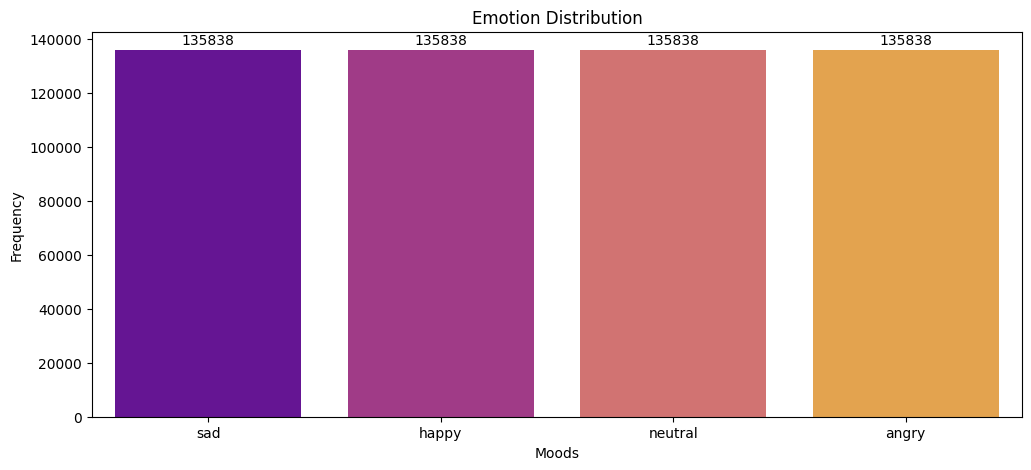

In [7]:
mood_count = pd.DataFrame(data['mood'].value_counts().reset_index())
plt.figure(figsize = (12, 5))
ax = sns.barplot(x = mood_count['mood'], y = mood_count['count'], palette = 'plasma')
plt.xlabel("Moods")
plt.ylabel("Frequency")
plt.title("Emotion Distribution")
for i in range(4):
    bars = ax.containers[i]
    plt.bar_label(bars, labels = [int(bar.get_height()) for bar in bars], padding = 2, fontsize = 10, color = "black")
plt.show()


In [8]:
df = data.copy()

The below code Standardizes the data for better model fitting

In [9]:
scaler = StandardScaler()
df[['heart_rate', 'Motion_dataX', 'Motion_dataY', 'Motion_dataZ', 'GSR',
       'PPG', 'Movement', 'Roll_mov_avg', 'Roll_mov_std', 'Roll_ppg_avg',
       'Roll_ppg_std', 'Roll_ppg_min', 'Roll_ppg_max', 'Roll_hr_avg',
       'Roll_hr_std', 'hr_x_gsr', 'hr_x_Movement', 'ppg_x_gsr', 'hr_diff']] = scaler.fit_transform(df[['heart_rate', 'Motion_dataX', 'Motion_dataY', 'Motion_dataZ', 'GSR',
       'PPG', 'Movement', 'Roll_mov_avg', 'Roll_mov_std', 'Roll_ppg_avg',
       'Roll_ppg_std', 'Roll_ppg_min', 'Roll_ppg_max', 'Roll_hr_avg',
       'Roll_hr_std', 'hr_x_gsr', 'hr_x_Movement', 'ppg_x_gsr', 'hr_diff']])
df.head()

,heart_rate,Motion_dataX,Motion_dataY,Motion_dataZ,GSR,PPG,sin_hour,cos_hour,sin_minute,cos_minute,...,Roll_ppg_min,Roll_ppg_max,Roll_hr_avg,Roll_hr_std,hr_x_gsr,hr_x_Movement,ppg_x_gsr,hr_diff,mood,true_label
0,1.625577,0.033247,1.035516,0.526700,-0.450273,-0.492414,-0.707107,0.707107,0.978148,0.207912,...,-0.163559,0.089646,1.397097,-0.012209,-0.434955,1.457617,-0.425863,-0.651370,sad,1
1,-1.284970,0.033668,-0.244821,1.180045,-0.456251,0.131715,0.707107,0.707107,0.743145,-0.669131,...,0.227827,-0.118080,-1.395039,-1.104974,-0.449090,-1.146120,-0.428092,-0.000843,happy,0
2,1.325520,0.579717,0.753017,0.771803,0.130587,-0.894728,0.707107,-0.707107,-0.406737,0.913545,...,-0.488442,-0.084816,0.009277,2.489910,0.279411,1.398496,-0.089007,-0.082159,neutral,3
3,1.121482,-1.030978,0.895355,-1.198296,-0.376693,-0.618281,-0.500000,-0.866025,-0.913545,0.406737,...,-0.337261,-0.354156,1.035274,0.177719,-0.349852,1.033118,-0.375403,0.324421,angry,2
4,-0.312788,-1.056149,0.772534,0.285974,-0.449878,-0.722369,-0.258819,-0.965926,0.669131,0.743145,...,-0.311840,-0.424833,-0.207556,-0.581781,-0.441692,-0.419890,-0.426985,0.080473,neutral,3


In [10]:
df.columns

Index(['heart_rate', 'Motion_dataX', 'Motion_dataY', 'Motion_dataZ', 'GSR',
       'PPG', 'sin_hour', 'cos_hour', 'sin_minute', 'cos_minute',
       'sin_weekday', 'cos_weekday', 'is_weekend', 'Movement', 'Roll_mov_avg',
       'Roll_mov_std', 'Roll_ppg_avg', 'Roll_ppg_std', 'Roll_ppg_min',
       'Roll_ppg_max', 'Roll_hr_avg', 'Roll_hr_std', 'hr_x_gsr',
       'hr_x_Movement', 'ppg_x_gsr', 'hr_diff', 'mood', 'true_label'],
      dtype='object')

The below codes splits the data into training, testing, and validation set for better model training and overall generalization

### 80/20 Split

In [11]:
df_x = df[['heart_rate', 'Motion_dataX', 'Motion_dataY', 'Motion_dataZ', 'GSR',
       'PPG', 'sin_hour', 'cos_hour', 'sin_minute', 'cos_minute',
       'sin_weekday', 'cos_weekday', 'is_weekend', 'Movement', 'Roll_mov_avg',
       'Roll_mov_std', 'Roll_ppg_avg', 'Roll_ppg_std', 'Roll_ppg_min',
       'Roll_ppg_max', 'Roll_hr_avg', 'Roll_hr_std', 'hr_x_gsr',
       'hr_x_Movement', 'ppg_x_gsr', 'hr_diff']]
df_y = df['true_label'].values
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size = 0.20, random_state = 42, stratify = df_y)
print(f"Shape of Training Data : {train_x.shape}, {train_y.shape}\nShape of Testing Data : {test_x.shape}, {test_y.shape}")

Shape of Training Data : (434681, 26), (434681,)
Shape of Testing Data : (108671, 26), (108671,)


### 70/30 Split for Validation

In [12]:
train_x, validation_x, train_y, validation_y = train_test_split(train_x, train_y, test_size = 0.30, random_state = 42, stratify = train_y)
print(f"Shape of Training Data : {train_x.shape}, {train_y.shape}\nShape of Validation Data : {validation_x.shape}, {validation_y.shape}")

Shape of Training Data : (304276, 26), (304276,)
Shape of Validation Data : (130405, 26), (130405,)


Below are the models used to predict the moods based on the available data

### K-Neighbors Classifier

In [13]:
model1 = KNeighborsClassifier(n_neighbors = 5)
model1.fit(train_x, train_y)
predicted_y1 = model1.predict(test_x)
accuracy1 = accuracy_score(test_y, predicted_y1)
print(f"The Accuracy Using KNeighborsClassifier is : {round(accuracy1, 3)}")

The Accuracy Using KNeighborsClassifier is : 0.939


### Hyperparameter Tuning of K-Neighbors Classifier

In [14]:
knc = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(3, 6),  
    'weights': ['distance'],       
    'metric': ['manhattan'],
}

grid1 = GridSearchCV(knc, param_grid = param_grid, n_jobs=-1, cv = 2, scoring = 'accuracy')
grid1.fit(validation_x, validation_y)
print(f"The Best Estimator for KNeighborsClassifier is : {grid1.best_estimator_}")
print(f"The Best Parameters for KNeighborsClassifier is : {grid1.best_params_}")


The Best Estimator for KNeighborsClassifier is : KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')
The Best Parameters for KNeighborsClassifier is : {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


### Tuned K-Neighbors Classifier

In [15]:
final_model1 = grid1.best_estimator_
final_model1.fit(train_x, train_y)
final_predicted_y1 = final_model1.predict(test_x)
final_accuracy1 = accuracy_score(test_y, final_predicted_y1)
print(f"The Accuracy Using Tuned KNeighborsClassifier is : {round(final_accuracy1, 3)}")

The Accuracy Using Tuned KNeighborsClassifier is : 0.973


In [16]:
print(classification_report(test_y, final_predicted_y1, labels = [0, 1, 2, 3], target_names = ["happy", "sad", "angry", "neutral"]))
report1 = classification_report(test_y, final_predicted_y1, labels = [0, 1, 2, 3], target_names = ["happy", "sad", "angry", "neutral"], output_dict = True)

              precision    recall  f1-score   support

       happy       0.97      0.98      0.97     27168
         sad       0.96      0.99      0.98     27167
       angry       0.98      1.00      0.99     27168
     neutral       0.99      0.92      0.96     27168

    accuracy                           0.97    108671
   macro avg       0.97      0.97      0.97    108671
weighted avg       0.97      0.97      0.97    108671



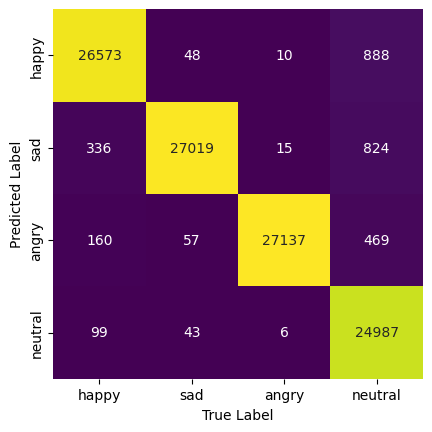

In [17]:
class_names = ["happy", "sad", "angry", "neutral"]
mat = confusion_matrix(test_y, final_predicted_y1)
sns.heatmap(mat.T, square = True, cmap = "viridis", annot = True, fmt = "d", xticklabels = class_names, yticklabels = class_names, cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

### Random Forest Classifier

In [18]:
model2 = RandomForestClassifier(random_state = 42)
model2.fit(train_x, train_y)
predicted_y2 = model2.predict(test_x)
accuracy2 = accuracy_score(test_y, predicted_y2)
print(f"The Accuracy Score Using Random Forest Classifier is : {round(accuracy2, 3)}")

The Accuracy Score Using Random Forest Classifier is : 0.989


In [19]:
report2 = classification_report(test_y, predicted_y2, labels = [0, 1, 2, 3], target_names = ["happy", "sad", "angry", "neutral"], output_dict = True)
print(classification_report(test_y, predicted_y2, labels = [0, 1, 2, 3], target_names = ["happy", "sad", "angry", "neutral"]))

              precision    recall  f1-score   support

       happy       0.98      0.99      0.99     27168
         sad       0.99      1.00      0.99     27167
       angry       1.00      1.00      1.00     27168
     neutral       1.00      0.97      0.98     27168

    accuracy                           0.99    108671
   macro avg       0.99      0.99      0.99    108671
weighted avg       0.99      0.99      0.99    108671



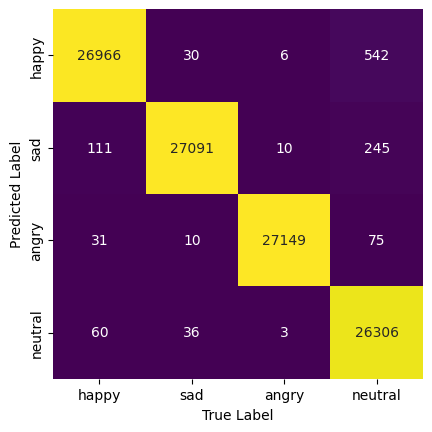

In [20]:
class_names = ["happy", "sad", "angry", "neutral"]
mat = confusion_matrix(test_y, predicted_y2)
sns.heatmap(mat.T, square = True, cmap = "viridis", annot = True, fmt = "d", xticklabels = class_names, yticklabels = class_names, cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

Below is the representaion of the metrics for the evaluation of the model

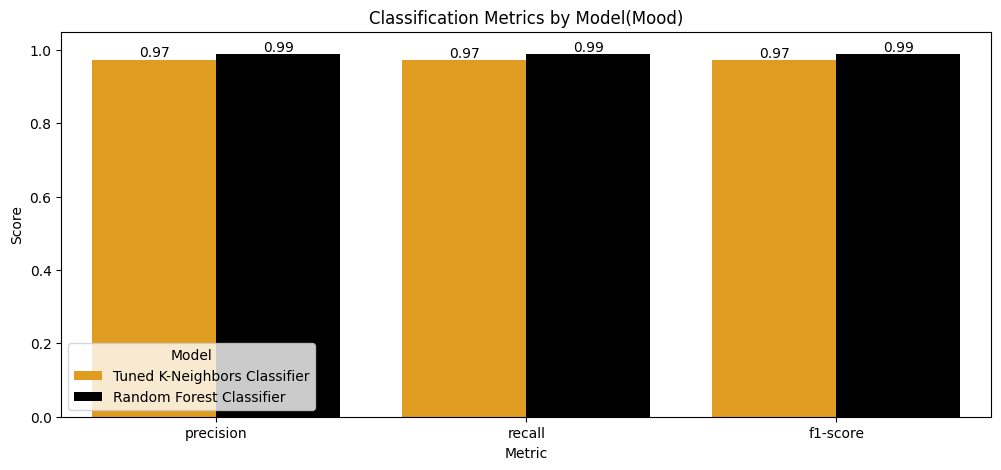

In [21]:
prec1 = report1['weighted avg']['precision']
rec1 = report1['weighted avg']['recall']
f1_1 = report1['weighted avg']['f1-score']
prec2 = report2['weighted avg']['precision']
rec2 = report2['weighted avg']['recall']
f1_2 = report2['weighted avg']['f1-score']

metric_dict = {'Tuned K-Neighbors Classifier' : [prec1, rec1, f1_1],
               'Random Forest Classifier' : [prec2, rec2, f1_2]}

metric = pd.DataFrame(metric_dict, index = ['precision', 'recall', 'f1-score'])
metric_long = metric.reset_index().melt(id_vars = 'index', var_name = 'Model', value_name = 'Score')
metric_long.rename(columns = {'index' : 'Metric'}, inplace = True)
plt.figure(figsize = (12, 5))
orange_black_palette = sns.color_palette(["orange", "black"])
ax = sns.barplot(data = metric_long, x = 'Metric', y = 'Score', hue = 'Model', palette = orange_black_palette)
plt.ylim(0, 1.05)
plt.title('Classification Metrics by Model(Mood)')
plt.ylabel('Score')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f',padding = 0, fontsize = 10, color='black')
plt.show()

Following is the data used for the prediction of the age

### Age Prediction

In [22]:
actual_age = pd.read_csv(r"actual_age.csv")
actual_age.head()

,acc_x,acc_y,acc_z,age,movement,roll_mean_movement,roll_std_movement,roll_skew_movement,roll_kurtosis_movement,bvp,eda,hr,temp,x_y,y_z,z_x,hr_eda,bvp_hr,temp_eda,age_class
0,-48.56250,38.09375,19.59375,22,64.756198,64.720186,0.108265,-1.331233,-1.5,-41.960313,0.827957,57.00,35.50,-1849.927734,746.399414,-951.521484,47.193549,-2391.737813,29.392474,0
1,-48.96875,37.50000,19.25000,22,64.612313,64.724789,0.100521,-1.268818,-1.5,26.300156,0.928215,74.33,35.50,-1836.328125,721.875000,-942.648438,68.994221,1954.890614,32.951633,0
2,-48.90625,37.75000,19.18750,22,64.691916,64.686809,0.072079,-0.317217,-1.5,1.240781,0.961848,69.75,35.49,-1846.210938,724.328125,-938.388672,67.088898,86.544492,34.135986,0
3,-49.18750,37.65625,18.81250,22,64.740354,64.681528,0.064650,-0.704398,-1.5,-3.631719,0.945192,90.60,35.47,-1852.216797,708.408203,-925.339844,85.634373,-329.033719,33.525951,0
4,-49.18750,37.68750,18.78125,22,64.749465,64.727245,0.030933,-1.564571,-1.5,8.730000,0.943910,105.83,35.47,-1853.753906,707.818359,-923.802734,99.894022,923.895900,33.480497,0


In [23]:
actual_age.columns

Index(['acc_x', 'acc_y', 'acc_z', 'age', 'movement', 'roll_mean_movement',
       'roll_std_movement', 'roll_skew_movement', 'roll_kurtosis_movement',
       'bvp', 'eda', 'hr', 'temp', 'x_y', 'y_z', 'z_x', 'hr_eda', 'bvp_hr',
       'temp_eda', 'age_class'],
      dtype='object')

In [24]:
actual_age.describe()

,acc_x,acc_y,acc_z,age,movement,roll_mean_movement,roll_std_movement,roll_skew_movement,roll_kurtosis_movement,bvp,eda,hr,temp,x_y,y_z,z_x,hr_eda,bvp_hr,temp_eda,age_class
count,123891.000000,123891.000000,123891.000000,123891.000000,123891.000000,123891.000000,123891.000000,123891.000000,1.238910e+05,123891.000000,123891.000000,123891.000000,123891.000000,123891.000000,123891.000000,123891.000000,123891.000000,123891.000000,123891.000000,123891.000000
mean,3.893757,-5.333385,20.929534,25.833644,63.379319,63.379074,0.589313,0.644276,-1.500000e+00,0.000399,3.676786,84.936261,35.144474,-77.370797,-77.726484,83.834041,388.177000,0.024592,136.341340,0.698751
std,41.812048,31.855007,27.859790,3.846172,1.960077,1.432338,1.530921,150.345816,1.725882e-11,25.513383,6.368334,24.452491,22.080369,1051.936833,871.964366,1087.289561,837.471140,2223.586795,268.565426,0.458802
min,-70.718750,-81.625000,-66.625000,19.000000,19.457436,35.754028,0.000004,-1729.986327,-1.500000e+00,-372.210938,0.000000,49.800000,23.390000,-3564.677734,-2772.000000,-4148.433594,0.000000,-38970.865664,0.000000,0.000000
25%,-38.328125,-29.218750,4.312500,22.000000,62.829413,62.791946,0.057894,-1.385317,-1.500000e+00,-4.740000,0.346944,69.450000,31.490000,-904.012695,-596.130371,-691.813477,27.576621,-389.994523,11.098099,0.000000
50%,12.000000,-6.531250,22.031250,27.000000,63.419379,63.363483,0.117488,-0.199261,-1.500000e+00,0.094687,1.061381,78.030000,32.630000,-14.910156,-3.851562,145.654297,82.092667,7.191553,34.885502,1.000000
75%,42.031250,15.593750,45.875000,28.000000,64.358721,64.294748,0.334120,1.163711,-1.500000e+00,5.285547,4.443365,92.000000,33.680000,631.257324,424.830078,972.189941,376.511350,436.690124,147.406580,1.000000
max,78.031250,77.250000,69.093750,35.000000,106.703563,81.188953,37.940124,30399.699989,-1.500000e+00,448.614219,55.742296,197.450000,234.950000,5630.442383,2570.557617,2501.747070,8902.220382,33399.681244,6368.835642,1.000000


The data has been splitted in the training and testing set for the model evaluation on unseen data

### Training and Testing Set 

In [25]:
training_age = actual_age[~actual_age['age'].isin([22, 25, 27])]
testing_age = actual_age[actual_age['age'].isin([22, 25, 27])]

train_x = training_age[['acc_x', 'acc_y', 'acc_z', 'movement', 'roll_mean_movement',
       'roll_std_movement', 'roll_skew_movement', 'roll_kurtosis_movement',
       'bvp', 'eda', 'hr', 'temp', 'x_y', 'y_z', 'z_x', 'hr_eda', 'bvp_hr',
       'temp_eda']]
train_y = training_age[['age_class']].values

test_x = testing_age[['acc_x', 'acc_y', 'acc_z', 'movement', 'roll_mean_movement',
       'roll_std_movement', 'roll_skew_movement', 'roll_kurtosis_movement',
       'bvp', 'eda', 'hr', 'temp', 'x_y', 'y_z', 'z_x', 'hr_eda', 'bvp_hr',
       'temp_eda']]
test_y = testing_age[['age_class']].values

In [26]:
training_age['age_class'].value_counts()

age_class
1    41173
0    24701
Name: count, dtype: int64

In [27]:
testing_age['age_class'].value_counts()

age_class
1    45396
0    12621
Name: count, dtype: int64

The data has been standardized for the better model fitting

In [28]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

These are the models used for the prediction of the age

### K-Neighbors Classifier

In [29]:
model3 = KNeighborsClassifier(n_neighbors = 13, weights = 'distance', metric = 'manhattan')
model3.fit(train_x, train_y)
predicted_y3 = model3.predict(test_x)
accuracy3 = accuracy_score(test_y, predicted_y3)
print(f"The Accuracy Score Using KNeighborsClassifier is : {accuracy3:.2f}")

The Accuracy Score Using KNeighborsClassifier is : 0.87


In [30]:
age_labels = ['under 25', 'Over 25']
report3 = classification_report(test_y, predicted_y3, target_names = age_labels, output_dict = True)
print(classification_report(test_y, predicted_y3, target_names = age_labels))

              precision    recall  f1-score   support

    under 25       0.67      0.80      0.73     12621
     Over 25       0.94      0.89      0.92     45396

    accuracy                           0.87     58017
   macro avg       0.81      0.85      0.82     58017
weighted avg       0.88      0.87      0.88     58017



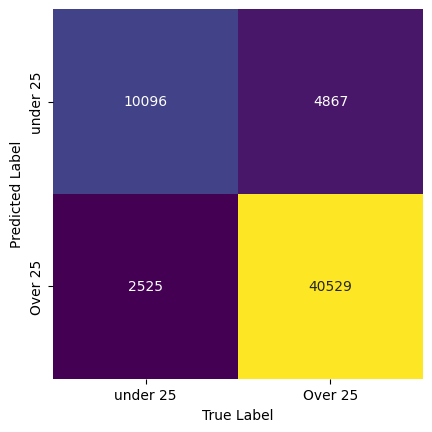

In [31]:
mat = confusion_matrix(test_y, predicted_y3)
sns.heatmap(mat.T, square = True, cmap = "viridis", annot = True, fmt = "d", xticklabels = age_labels, yticklabels = age_labels, cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

### Hyperparameter Tuninig of K-Neighbors Classifier

In [32]:
knc2 = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(26, 30),  
    'weights': ['distance'],       
    'metric': ['manhattan'],
}

grid2 = GridSearchCV(knc2, param_grid = param_grid, n_jobs=-1, cv = 2, scoring = 'f1_weighted')
grid2.fit(train_x, train_y)
print(f"The Best Estimator for KNeighborsClassifier is : {grid2.best_estimator_}")
print(f"The Best Parameters for KNeighborsClassifier is : {grid2.best_params_}")

The Best Estimator for KNeighborsClassifier is : KNeighborsClassifier(metric='manhattan', n_neighbors=28, weights='distance')
The Best Parameters for KNeighborsClassifier is : {'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'distance'}


### Tuned K-Neighbors Classifier

In [33]:
final_model2 = grid2.best_estimator_
final_model2.fit(train_x, train_y)
final_predicted_y2 = final_model2.predict(test_x)
final_accuracy2 = accuracy_score(test_y, final_predicted_y2)
print(f"The Accuracy Score Using Tuned KNeighborsClassifier is : {final_accuracy2:.2f}")

The Accuracy Score Using Tuned KNeighborsClassifier is : 0.89


In [34]:
report4 = classification_report(test_y, final_predicted_y2, target_names = age_labels, output_dict = True)
print(classification_report(test_y, final_predicted_y2, target_names = age_labels))

              precision    recall  f1-score   support

    under 25       0.70      0.83      0.76     12621
     Over 25       0.95      0.90      0.93     45396

    accuracy                           0.89     58017
   macro avg       0.83      0.86      0.84     58017
weighted avg       0.90      0.89      0.89     58017



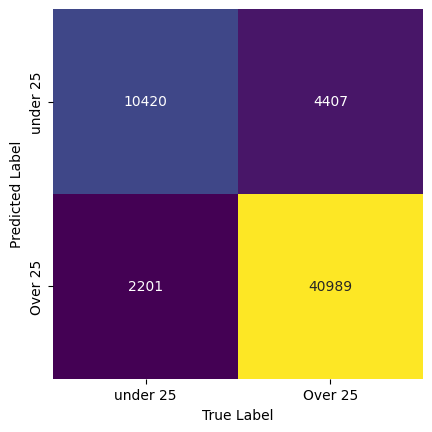

In [35]:
mat = confusion_matrix(test_y, final_predicted_y2)
sns.heatmap(mat.T, square = True, cmap = "viridis", annot = True, fmt = "d", xticklabels = age_labels, yticklabels = age_labels, cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

### Random Forest Classifier

In [36]:
model4 = RandomForestClassifier()
model4.fit(train_x, train_y)
predicted_y4 = model4.predict(test_x)
accuracy4 = accuracy_score(test_y, predicted_y4)
print(f"The Accuracy Score Using RandomForestClassifier is : {accuracy4:.2f}")

The Accuracy Score Using RandomForestClassifier is : 0.66


In [37]:
report5 = classification_report(test_y, predicted_y4, target_names = age_labels, output_dict = True)
print(classification_report(test_y, predicted_y4, target_names = age_labels))

              precision    recall  f1-score   support

    under 25       0.38      0.87      0.52     12621
     Over 25       0.94      0.60      0.73     45396

    accuracy                           0.66     58017
   macro avg       0.66      0.73      0.63     58017
weighted avg       0.82      0.66      0.69     58017



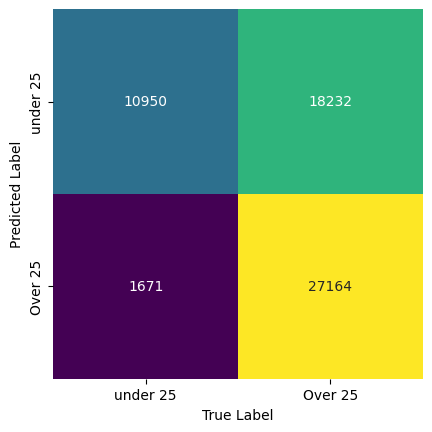

In [38]:
mat = confusion_matrix(test_y, predicted_y4)
sns.heatmap(mat.T, square = True, cmap = "viridis", annot = True, fmt = "d", xticklabels = age_labels, yticklabels = age_labels, cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

### Balanced Random Forest Classifier

In [39]:
model5 = BalancedRandomForestClassifier(class_weight = 'balanced')
model5.fit(train_x, train_y)
predicted_y5 = model5.predict(test_x)
accuracy5 = accuracy_score(test_y, predicted_y5)
print(f"The Accuracy Score Using RandomForestClassifier is : {accuracy5:.2f}")


The Accuracy Score Using RandomForestClassifier is : 0.65


In [40]:
report6 = classification_report(test_y, predicted_y5, target_names = age_labels, output_dict = True)
print(classification_report(test_y, predicted_y5, target_names = age_labels))

              precision    recall  f1-score   support

    under 25       0.37      0.91      0.53     12621
     Over 25       0.96      0.57      0.72     45396

    accuracy                           0.65     58017
   macro avg       0.66      0.74      0.62     58017
weighted avg       0.83      0.65      0.68     58017



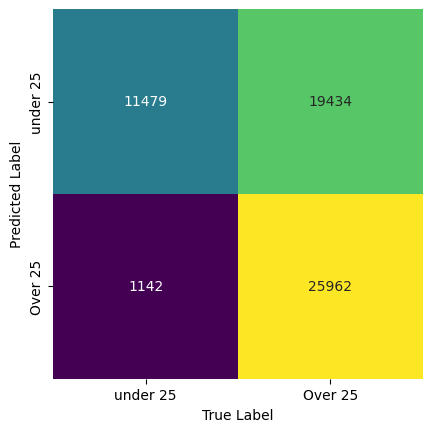

In [41]:
mat = confusion_matrix(test_y, predicted_y5)
sns.heatmap(mat.T, square = True, cmap = "viridis", annot = True, fmt = "d", xticklabels = age_labels, yticklabels = age_labels, cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

Since the results with the available data were not so good two different type of SMOTE(SMOTE and BorderlineSMOTE) has been used to combine the data for different classes(Under 25 and above 25(including 25)) for better model fitting and genralization and then has been standardized

### Age Prediction with Resampled Data

In [42]:
actual_age = pd.read_csv(r"actual_age.csv")
training_age = actual_age[~actual_age['age'].isin([22, 25, 27])]
testing_age = actual_age[actual_age['age'].isin([22, 25, 27])]

cols = ['acc_x', 'acc_y', 'acc_z', 'movement', 'roll_mean_movement',
       'roll_std_movement', 'roll_skew_movement', 'roll_kurtosis_movement',
       'bvp', 'eda', 'hr', 'temp', 'x_y', 'y_z', 'z_x', 'hr_eda', 'bvp_hr',
       'temp_eda']

train_x = training_age[cols]
train_y = training_age[['age_class']].values

test_x = testing_age[cols]
test_y = testing_age[['age_class']].values

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

blsm = BorderlineSMOTE(random_state=42)
sm = SMOTE(random_state=42)

blsm_train_x, blsm_train_y = blsm.fit_resample(train_x, train_y)
sm_train_x, sm_train_y = sm.fit_resample(train_x, train_y)

blsm_train_x_df = pd.DataFrame(blsm_train_x, columns=cols)
blsm_train_y_df = pd.DataFrame(blsm_train_y, columns=['age_class'])

sm_train_x_df = pd.DataFrame(sm_train_x, columns=cols)
sm_train_y_df = pd.DataFrame(sm_train_y, columns=['age_class'])

blsm_data = pd.concat([blsm_train_x_df, blsm_train_y_df], axis=1)
sm_data = pd.concat([sm_train_x_df, sm_train_y_df], axis=1)

class_0 = sm_data[sm_data['age_class'] == 0]
class_1 = blsm_data[blsm_data['age_class'] == 1]

smoted_data = pd.concat([class_0, class_1], axis=0, ignore_index=True)

res_train_x = smoted_data[cols]
res_train_y = smoted_data[['age_class']].values

Below are the models used for the prediction of the age based on the resampled data

### K-Neighbors Classifier

In [43]:
model6 = KNeighborsClassifier(n_neighbors = 13, weights = 'distance', metric = 'manhattan')
model6.fit(res_train_x, res_train_y)
predicted_y6 = model6.predict(test_x)
accuracy6 = accuracy_score(test_y, predicted_y6)
print(f"The Accuracy Score Using KNeighborsClassifier is : {accuracy6:.2f}")

The Accuracy Score Using KNeighborsClassifier is : 0.85


In [44]:
age_labels = ['under 25', 'Over 25']
report7 = classification_report(test_y, predicted_y6, target_names = age_labels, output_dict = True)
print(classification_report(test_y, predicted_y6, target_names = age_labels))

              precision    recall  f1-score   support

    under 25       0.62      0.84      0.71     12621
     Over 25       0.95      0.86      0.90     45396

    accuracy                           0.85     58017
   macro avg       0.78      0.85      0.80     58017
weighted avg       0.88      0.85      0.86     58017



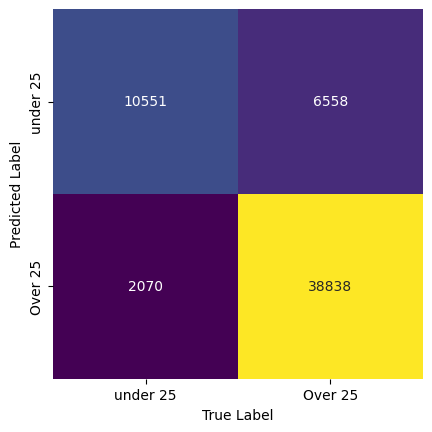

In [45]:
mat = confusion_matrix(test_y, predicted_y6)
sns.heatmap(mat.T, square = True, cmap = "viridis", annot = True, fmt = "d", xticklabels = age_labels, yticklabels = age_labels, cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

### Hyperparameter Tuning of K-Neighbors Classifier

In [46]:
knc3 = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(5, 8),  
    'weights': ['distance'],       
    'metric': ['manhattan'],
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid2 = GridSearchCV(knc3, param_grid = param_grid, n_jobs=-1, cv = cv, scoring = 'accuracy')
grid2.fit(res_train_x, res_train_y)
print(f"The Best Estimator for KNeighborsClassifier is : {grid2.best_estimator_}")
print(f"The Best Parameters for KNeighborsClassifier is : {grid2.best_params_}")

The Best Estimator for KNeighborsClassifier is : KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')
The Best Parameters for KNeighborsClassifier is : {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}


### Tuned K-Neighbors Classifier

In [47]:
final_model3 = grid2.best_estimator_
final_model3.fit(res_train_x, res_train_y)
final_predicted_y3 = final_model3.predict(test_x)
final_accuracy3 = accuracy_score(test_y, final_predicted_y3)
print(f"The Accuracy Score Using Tuned KNeighborsClassifier is : {final_accuracy3:.2f}")

The Accuracy Score Using Tuned KNeighborsClassifier is : 0.84


In [48]:
report8 = classification_report(test_y, final_predicted_y3, target_names = age_labels, output_dict = True)
print(classification_report(test_y, final_predicted_y3, target_names = age_labels))

              precision    recall  f1-score   support

    under 25       0.60      0.79      0.68     12621
     Over 25       0.93      0.86      0.89     45396

    accuracy                           0.84     58017
   macro avg       0.77      0.82      0.79     58017
weighted avg       0.86      0.84      0.85     58017



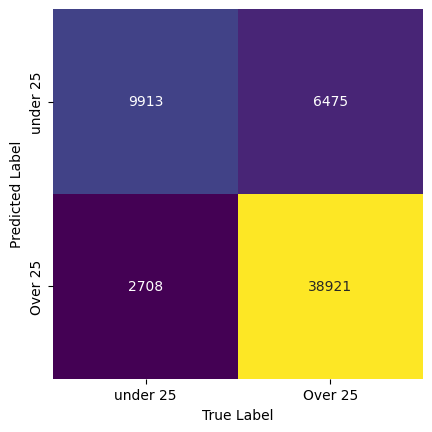

In [49]:
mat = confusion_matrix(test_y, final_predicted_y3)
sns.heatmap(mat.T, square = True, cmap = "viridis", annot = True, fmt = "d", xticklabels = age_labels, yticklabels = age_labels, cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

### Random Forest Classifier

In [50]:
model8 = RandomForestClassifier()
model8.fit(res_train_x, res_train_y)
predicted_y8 = model8.predict(test_x)
accuracy8 = accuracy_score(test_y, predicted_y8)
print(f"The Accuracy Score Using RandomForestClassifier is : {accuracy8:.2f}")

The Accuracy Score Using RandomForestClassifier is : 0.64


In [51]:
report9 = classification_report(test_y, predicted_y8, target_names = age_labels, output_dict = True)
print(classification_report(test_y, predicted_y8, target_names = age_labels))

              precision    recall  f1-score   support

    under 25       0.36      0.87      0.51     12621
     Over 25       0.94      0.58      0.71     45396

    accuracy                           0.64     58017
   macro avg       0.65      0.72      0.61     58017
weighted avg       0.82      0.64      0.67     58017



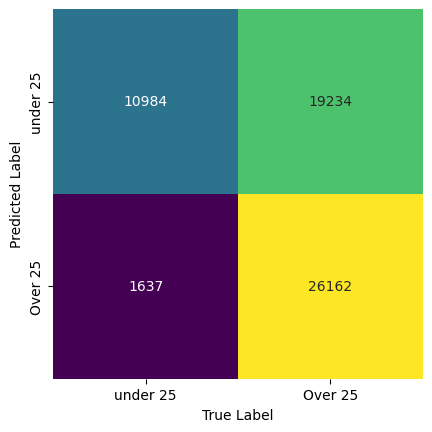

In [52]:
mat = confusion_matrix(test_y, predicted_y8)
sns.heatmap(mat.T, square = True, cmap = "viridis", annot = True, fmt = "d", xticklabels = age_labels, yticklabels = age_labels, cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

### MLP Classifier

In [53]:
model9 = MLPClassifier()
model9.fit(res_train_x, res_train_y)
predicted_y9 = model9.predict(test_x)
accuracy9 = accuracy_score(test_y, predicted_y9)
print(f"The Accuracy Score Using RandomForestClassifier is : {accuracy9:.2f}")

The Accuracy Score Using RandomForestClassifier is : 0.74


In [54]:
report10 = classification_report(test_y, predicted_y9, target_names = age_labels, output_dict = True)
print(classification_report(test_y, predicted_y9, target_names = age_labels))

              precision    recall  f1-score   support

    under 25       0.44      0.87      0.59     12621
     Over 25       0.95      0.70      0.81     45396

    accuracy                           0.74     58017
   macro avg       0.70      0.78      0.70     58017
weighted avg       0.84      0.74      0.76     58017



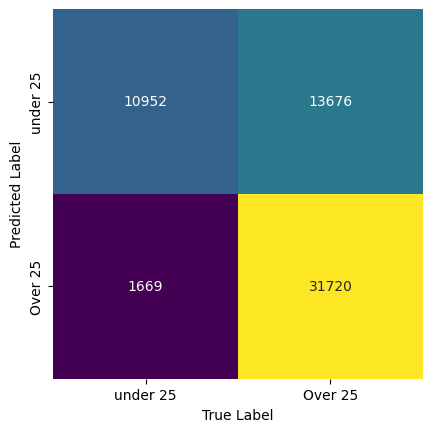

In [55]:
mat = confusion_matrix(test_y, predicted_y9)
sns.heatmap(mat.T, square = True, cmap = "viridis", annot = True, fmt = "d", xticklabels = age_labels, yticklabels = age_labels, cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

### Hyperparameter Tuning of MLP Classifier

In [56]:
mlp = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(50,), (30, 20)],
    'activation': ['relu'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001],
    'batch_size': [32, 64]
}

grid3 = GridSearchCV(estimator = mlp, param_grid = param_grid, n_jobs=-1, scoring = 'accuracy', cv = 2)
grid3.fit(res_train_x, res_train_y)
print(f"The Best Estimator for KNeighborsClassifier is : {grid3.best_estimator_}")
print(f"The Best Parameters for KNeighborsClassifier is : {grid3.best_params_}")


The Best Estimator for KNeighborsClassifier is : MLPClassifier(alpha=0.001, batch_size=64, hidden_layer_sizes=(50,))
The Best Parameters for KNeighborsClassifier is : {'activation': 'relu', 'alpha': 0.001, 'batch_size': 64, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}


### Tuned MLP Classifier

In [57]:
final_model4 = grid3.best_estimator_
final_model4.fit(res_train_x, res_train_y)
final_predicted_y4 = final_model4.predict(test_x)
final_accuracy4 = accuracy_score(test_y, final_predicted_y4)
print(f"The Accuracy Score Using Tuned KNeighborsClassifier is : {final_accuracy4:.2f}")

The Accuracy Score Using Tuned KNeighborsClassifier is : 0.73


In [58]:
report11 = classification_report(test_y, final_predicted_y4, target_names = age_labels, output_dict = True)
print(classification_report(test_y, final_predicted_y4, target_names = age_labels))

              precision    recall  f1-score   support

    under 25       0.43      0.82      0.56     12621
     Over 25       0.93      0.70      0.80     45396

    accuracy                           0.73     58017
   macro avg       0.68      0.76      0.68     58017
weighted avg       0.82      0.73      0.75     58017



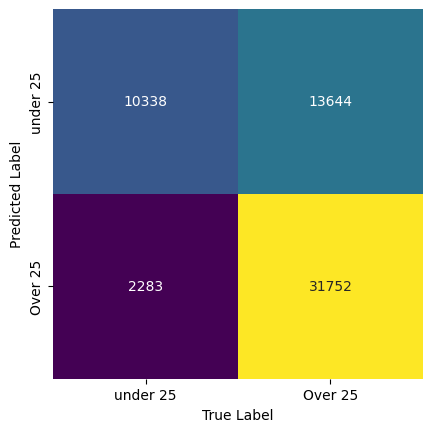

In [59]:
mat = confusion_matrix(test_y, final_predicted_y4)
sns.heatmap(mat.T, square = True, cmap = "viridis", annot = True, fmt = "d", xticklabels = age_labels, yticklabels = age_labels, cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

### Support Vector Classifier

In [60]:
model10 = SVC(kernel = 'rbf', C = 10, gamma = 'auto')
model10.fit(res_train_x, res_train_y)
predicted_y10 = model10.predict(test_x)
accuracy10 = accuracy_score(test_y, predicted_y10)
print(f"The Accuracy Score Using RandomForestClassifier is : {accuracy10:.2f}")

The Accuracy Score Using RandomForestClassifier is : 0.86


In [61]:
age_labels = ['under 25', 'Over 25']
report12 = classification_report(test_y, predicted_y10, target_names = age_labels, output_dict = True)
print(classification_report(test_y, predicted_y10, target_names = age_labels))

              precision    recall  f1-score   support

    under 25       0.63      0.86      0.73     12621
     Over 25       0.96      0.86      0.91     45396

    accuracy                           0.86     58017
   macro avg       0.79      0.86      0.82     58017
weighted avg       0.89      0.86      0.87     58017



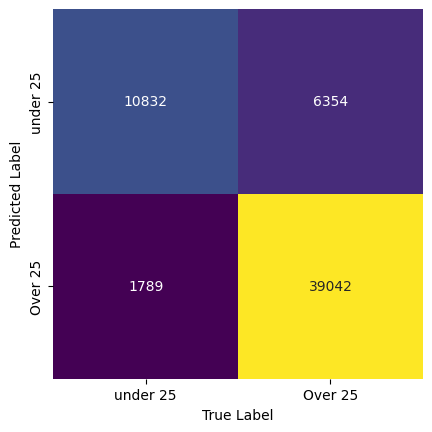

In [62]:
mat = confusion_matrix(test_y, predicted_y10)
sns.heatmap(mat.T, square = True, cmap = "viridis", annot = True, fmt = "d", xticklabels = age_labels, yticklabels = age_labels, cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

### Hyperparameter Tuning of Support Vector Classifer

In [72]:
svc = SVC()

param_grid = {
    'C': [0.001, 10],
    'gamma': ['auto'],
    'kernel': ['rbf']
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid4 = GridSearchCV(svc, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid4.fit(res_train_x, res_train_y.ravel())
print("The Best Parameters for SupportVectorClassifier is :", grid4.best_params_)
print("The Best Estimtors for SupportVectorClassifier is :", grid4.best_estimator_)

The Best Parameters for SupportVectorClassifier is : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
The Best Estimtors for SupportVectorClassifier is : SVC(C=10, gamma='auto')


### Tuned Support Vector Classifer

In [64]:
final_model5 = grid4.best_estimator_
final_model5.fit(res_train_x, res_train_y)
final_predicted_y5 = final_model5.predict(test_x)
final_accuracy5 = accuracy_score(test_y, final_predicted_y5)
print(f"The Accuracy Score Using Tuned KNeighborsClassifier is : {final_accuracy5:.2f}")

The Accuracy Score Using Tuned KNeighborsClassifier is : 0.86


In [65]:
report13 = classification_report(test_y, final_predicted_y5, target_names = age_labels, output_dict = True)
print(classification_report(test_y, final_predicted_y5, target_names = age_labels))

              precision    recall  f1-score   support

    under 25       0.63      0.86      0.73     12621
     Over 25       0.96      0.86      0.91     45396

    accuracy                           0.86     58017
   macro avg       0.79      0.86      0.82     58017
weighted avg       0.89      0.86      0.87     58017



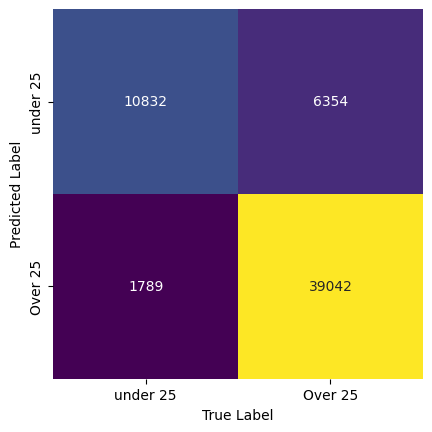

In [66]:
mat = confusion_matrix(test_y, final_predicted_y5)
sns.heatmap(mat.T, square = True, cmap = "viridis", annot = True, fmt = "d", xticklabels = age_labels, yticklabels = age_labels, cbar = False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

Following is the representation of different metrics for the better model evaluation

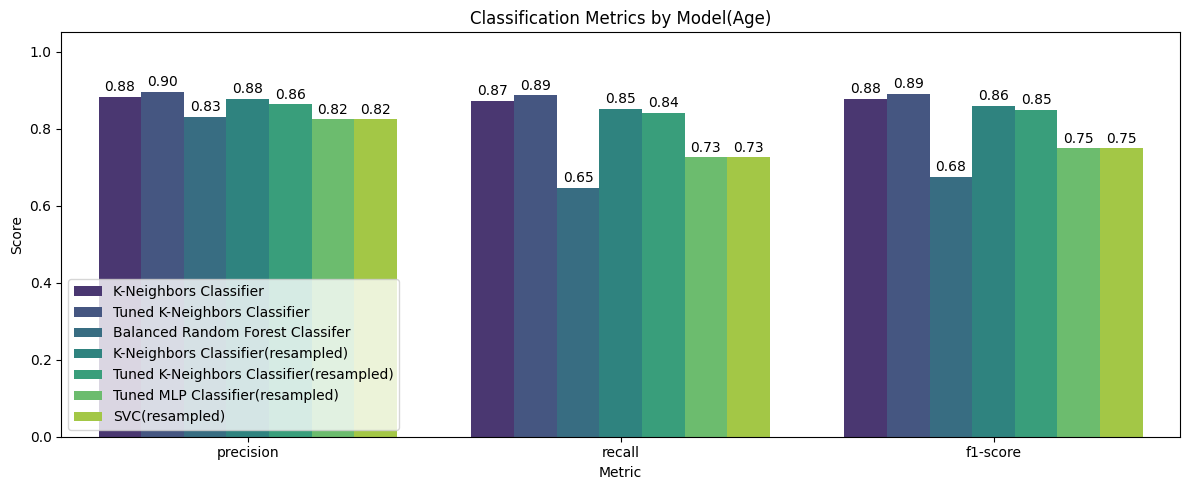

In [67]:
prec3 = report3['weighted avg']['precision']
rec3 = report3['weighted avg']['recall']
f1_3 = report3['weighted avg']['f1-score']
prec4 = report4['weighted avg']['precision']
rec4 = report4['weighted avg']['recall']
f1_4 = report4['weighted avg']['f1-score']
prec5 = report5['weighted avg']['precision']
rec5 = report5['weighted avg']['recall']
f1_5 = report5['weighted avg']['f1-score']
prec6 = report6['weighted avg']['precision']
rec6 = report6['weighted avg']['recall']
f1_6 = report6['weighted avg']['f1-score']
prec7 = report7['weighted avg']['precision']
rec7 = report7['weighted avg']['recall']
f1_7 = report7['weighted avg']['f1-score']
prec8 = report8['weighted avg']['precision']
rec8 = report8['weighted avg']['recall']
f1_8 = report8['weighted avg']['f1-score']
prec9 = report9['weighted avg']['precision']
rec9 = report9['weighted avg']['recall']
f1_9 = report9['weighted avg']['f1-score']
prec10 = report10['weighted avg']['precision']
rec10 = report10['weighted avg']['recall']
f1_10 = report10['weighted avg']['f1-score']
prec11 = report11['weighted avg']['precision']
rec11 = report11['weighted avg']['recall']
f1_11 = report11['weighted avg']['f1-score']
prec12 = report11['weighted avg']['precision']
rec12 = report11['weighted avg']['recall']
f1_12 = report11['weighted avg']['f1-score']
prec13 = report11['weighted avg']['precision']
rec13 = report11['weighted avg']['recall']
f1_13 = report11['weighted avg']['f1-score']

metric_dict2 = {'K-Neighbors Classifier' : [prec3, rec3, f1_3],
               'Tuned K-Neighbors Classifier' : [prec4, rec4, f1_4],
               'Balanced Random Forest Classifer' : [prec6, rec6, f1_6],
               'K-Neighbors Classifier(resampled)' : [prec7, rec7, f1_7],
               'Tuned K-Neighbors Classifier(resampled)' : [prec8, rec8, f1_8],
               'Tuned MLP Classifier(resampled)' : [prec11, rec11, f1_11],
               'SVC(resampled)' : [prec12, rec12, f1_12]}

metric2 = pd.DataFrame(metric_dict2, index = ['precision', 'recall', 'f1-score'])
metric_long2 = metric2.reset_index().melt(id_vars = 'index', var_name = 'Model', value_name = 'Score')
metric_long2.rename(columns = {'index' : 'Metric'}, inplace = True)
plt.figure(figsize = (12, 5))
ax = sns.barplot(data = metric_long2, x = 'Metric', y = 'Score', hue = 'Model', palette = 'viridis')
plt.ylim(0, 1.05)
plt.title('Classification Metrics by Model(Age)')
plt.ylabel('Score')
plt.legend(loc = 'best')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f', padding = 2)
plt.tight_layout()
plt.show()

Since ethnicity is independent of the features available in the dataset such as motion, heart rate, gsr we cannot predict it, So here in the project it has been taken at rndom from the available below

### Ethnicity Section

In [68]:
ethnicity = random.choice(['White', 'Black', 'Asian', 'Indian', 'Hispanic', 'Others'])
print(f"The ethnicity is : {ethnicity}")


The ethnicity is : Indian


Below is the Tag and Genre classification based on mood and age and Ethnicity

In [69]:
mood_data = pd.read_csv(r"mood_sample.csv")
mood_y = mood_data[['true_label']].values
mood_x = mood_data.drop(columns = ['Unnamed: 0','mood', 'true_label'])
mood_x = mood_x[['heart_rate', 'Motion_dataX', 'Motion_dataY', 'Motion_dataZ', 'GSR',
       'PPG', 'sin_hour', 'cos_hour', 'sin_minute', 'cos_minute',
       'sin_weekday', 'cos_weekday', 'is_weekend', 'Movement', 'Roll_mov_avg',
       'Roll_mov_std', 'Roll_ppg_avg', 'Roll_ppg_std', 'Roll_ppg_min',
       'Roll_ppg_max', 'Roll_hr_avg', 'Roll_hr_std', 'hr_x_gsr',
       'hr_x_Movement', 'ppg_x_gsr', 'hr_diff']]
mood = mode(model2.predict(mood_x))
print(f"The Accuracy of Predicting Mood is : {accuracy_score(mood_y, model2.predict(mood_x))}")

age_data = testing_age.copy()
age_data = age_data[age_data['age'] == 22]
age_y = age_data['age_class'].values
age_x = age_data.drop(columns = ['age_class', 'age'])
age = mode(model10.predict(scaler.transform(age_x)))
print(f"The Accuracy of Predicting Age is : {accuracy_score(age_y, model10.predict(scaler.transform(age_x))):.2f}")


The Accuracy of Predicting Mood is : 0.865
The Accuracy of Predicting Age is : 0.86


In [70]:
genre_map = {
    0: {  # Happy
        0: {  # Under 25
            'White': ['Pop', 'Dance/Electronic', 'Indie Rock'],
            'Black': ['Hip-Hop', 'Dancehall', 'Pop'],
            'Asian': ['K-Pop', 'J-Pop', 'Future Bass'],
            'Indian': ['Bollywood', 'Indian Pop', 'Punjabi Pop'],
            'Hispanic': ['Reggaeton', 'Latin Pop', 'Dance'],
            'Others': ['Pop', 'Dance', 'World Fusion']
        },
        1: {  # Above 25
            'White': ['Indie Pop', 'Soft Rock', 'Adult Contemporary'],
            'Black': ['Neo-Soul', 'R&B', 'Jazz Funk'],
            'Asian': ['Indie Pop', 'City Pop', 'Lounge'],
            'Indian': ['Old Bollywood', 'Soft Rock', 'Indie Hindi'],
            'Hispanic': ['Salsa', 'Cumbia', 'Bachata'],
            'Others': ['Adult Pop', 'Soft Rock', 'Global Indie']
        }
    },
    1: {  # Sad
        0: {
            'White': ['Lo-fi', 'Emo Rap', 'Alternative'],
            'Black': ['Lo-fi', 'Trap Soul', 'Slow R&B'],
            'Asian': ['Lo-fi', 'Ballads', 'Instrumental Pop'],
            'Indian': ['Lo-fi Hindi', 'Melancholic Pop', 'Slow Bollywood'],
            'Hispanic': ['Sad Latin Pop', 'Ballad', 'Trap Latino'],
            'Others': ['Lo-fi', 'Indie Ballad', 'Ambient Pop']
        },
        1: {
            'White': ['Acoustic', 'Blues', 'Folk'],
            'Black': ['Soul', 'Gospel', 'Blues'],
            'Asian': ['Acoustic', 'Traditional Asian', 'Soft Rock'],
            'Indian': ['Ghazal', 'Classical Indian', 'Acoustic Hindi'],
            'Hispanic': ['Bolero', 'Ranchera', 'Latin Jazz'],
            'Others': ['Acoustic', 'World Music', 'Blues']
        }
    },
    2: {  # Angry
        0: {
            'White': ['Trap Metal', 'Rap Rock', 'Punk'],
            'Black': ['Drill', 'Trap', 'Crunk'],
            'Asian': ['Trap', 'Rock', 'Hyperpop'],
            'Indian': ['Rap Hindi', 'Trap Hindi', 'Rock Hindi'],
            'Hispanic': ['Latin Trap', 'Urbano', 'Hard Reggaeton'],
            'Others': ['Trap', 'Rock', 'Fusion']
        },
        1: {
            'White': ['Hard Rock', 'Heavy Metal', 'Industrial'],
            'Black': ['Hardcore Hip-Hop', 'Rap Rock', 'Reggae Fusion'],
            'Asian': ['Hard Rock', 'Electronic Rock', 'J-Rock'],
            'Indian': ['Hard Rock', 'Fusion Rock', 'Hip-Hop Hindi'],
            'Hispanic': ['Rock en Español', 'Hard Salsa', 'Latin Rock'],
            'Others': ['Metal', 'Experimental Rock', 'Industrial']
        }
    },
    3: {  # Neutral
        0: {
            'White': ['Chillhop', 'Synthwave', 'Ambient'],
            'Black': ['Afrobeats', 'Lo-fi', 'Chillhop'],
            'Asian': ['Chillhop', 'K-Indie', 'Synth Pop'],
            'Indian': ['Chill Hindi', 'Lo-fi Hindi', 'Instrumental'],
            'Hispanic': ['Chill Latin', 'Tropical House', 'Lo-fi'],
            'Others': ['Chillhop', 'Ambient', 'Global Lo-fi']
        },
        1: {
            'White': ['Jazz', 'Instrumental', 'Classical'],
            'Black': ['Jazz', 'Soul Jazz', 'Neo-Soul'],
            'Asian': ['Jazz', 'Ambient', 'World Music'],
            'Indian': ['Instrumental Classical', 'Ambient', 'Indian Jazz'],
            'Hispanic': ['Latin Jazz', 'Bossa Nova', 'Instrumental Salsa'],
            'Others': ['Jazz', 'Instrumental', 'World Ambient']
        }
    }
}

def recommend_genres(mood, age, ethnicity):
    try:
        tags = genre_map[mood][age][ethnicity]
    except KeyError:
        tags = ['Pop', 'Instrumental', 'Fusion']
    
    return ' '.join(tags)


This is the final part of the project where the results from the above made models are used for the recommendation of the playlist based on Mood, Age, and Ethnicity

### Recommendations Using the API

In [71]:
api_key =  '...............................'
youtube = build('youtube', 'v3', developerKey=api_key)

def search_videos(query, max_results=50):
    request = youtube.search().list(
        part='snippet',
        q=query,
        type='playlist',
        maxResults=max_results
    )
    response = request.execute()
    return response['items']

def get_random_recommendations(query, sample_size=10):
    results = search_videos(query)
    sampled = random.sample(results, min(sample_size, len(results)))
    for i, item in enumerate(sampled, 1):
        title = item['snippet']['title']
        url = f"https://www.youtube.com/playlist?list={item['id']['playlistId']}"
        print(f"{i}. {title}\nURL: {url}\n")

# Example usage
query = f"{recommend_genres(mood, age, ethnicity)}"
get_random_recommendations(query)

1. Bollywood Hindi Lofi Songs | 90s Bollywood love Song
URL: https://www.youtube.com/playlist?list=PLAQN_kK7VUvs__swxS5JSAvqbghThE2sx

2. Mind Relax Lofi Mashup | Mind Relaxing Songs | Mind Relax Lofi Song | Slowed And Reverb | Lofi Songs
URL: https://www.youtube.com/playlist?list=PLeu3AGjqFMm-mvOCAIf7JoGKaCZ4AzSko

3. Top Hindi Lofi Song
URL: https://www.youtube.com/playlist?list=PLMfrZpGANLCfjJ7feACkXmMo7BJK3ocLw

4. Romantic Lofi Mix
URL: https://www.youtube.com/playlist?list=PLtUmIRHrMBN-95nFqZgb-OZkeynytv1Xf

5. Bollywood Lofi songs 2022
URL: https://www.youtube.com/playlist?list=PLgxs93BSP-hrI_pMZT28kVmGcvfFq234b

6. JISM (2002) || All Audio Songs || Lofi Songs || 90&#39;S Bollywood Hits || Sad Songs || Old Gaane ||
URL: https://www.youtube.com/playlist?list=PL65Li6U1azyg0fStr84HlTP79-IbiAomc

7. English Lofi songs
URL: https://www.youtube.com/playlist?list=PL0htMPdbfII_oBrA3YPAa2Pm2CJhNv-pY

8. LOFI Bollywood/ Hindi Chill Flips (Slow/ Reverb included)
URL: https://www.youtube.co